In [1]:
import numpy as np
import pandas as pd
from faerun import Faerun
import tmap as tm

from IPython.core.display import HTML
from IPython.display import IFrame
from mhfp.encoder import MHFPEncoder

from collections import Counter

from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
# Coniguration for the tmap layout
CFG_TMAP = tm.LayoutConfiguration()
CFG_TMAP.k = 50
CFG_TMAP.kc = 50
CFG_TMAP.node_size = 1 / 20

In [4]:
sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "dsIdx")
sample_data_tissue = sample_data["DI"].tolist()
tissue_type = []
for item in sample_data_tissue:
    if pd.isnull(item):
        tissue_type.append("Unknown") 
    elif item == "[]":
        tissue_type.append("Unknown")
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
    tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names= ["Cancer", "Origin", "Layer1", "Layer2"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
tissue_type = pd.Series(tissue_type)
cell_origin = pd.Series(cell_origin)
tissue_type = tissue_type.rename("Tissue")
cell_origin = cell_origin.rename("Tissue")

In [5]:
sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "dsIdx")
sample_data_tissue = sample_data["DI"].tolist()
tissue_type = []

unknown_list = []
unknown_count =1

for item in sample_data_tissue:
    if pd.isnull(item):
        unknown_list.append(str(unknown_count))
        unknown_count +=1
        continue
        
    elif item == "[]":
        unknown_list.append(str(unknown_count))
        unknown_count+=1
        continue
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
        unknown_count+=1
    tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names= ["Cancer", "Origin", "Layer1", "Layer2"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
tissue_type = pd.Series(tissue_type)
cell_origin = pd.Series(cell_origin)
tissue_type = tissue_type.rename("Tissue")
cell_origin = cell_origin.rename("Tissue")

In [6]:
metabolite_data = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv", index_col = "ionIdx")
metabolite_data = metabolite_data.drop("ionMz", axis =1)
metabolite_data.index.name = None

In [7]:
metabolite_data = metabolite_data.drop(unknown_list, axis =1)

In [8]:
X = metabolite_data

In [9]:
cell_origin = pd.DataFrame(cell_origin)
LABELS = cell_origin
LABELMAP = {"Lung": 1, "Breast": 2, "Skin": 3, "Unknown": 4, "Brain": 5
            , "Ovary":6, "Blood":7, "Colon":8, "Kidney":9, "Pancreas":10, "Prostate":11, "Bladder":12}
LABELS = np.array([int(LABELMAP[v]) for v in LABELS["Tissue"]], dtype=np.int)
DATA = metabolite_data.transpose()

In [10]:
legend_labels = {(1, "Lung"), (2, "Breast"), (3, "Skin"), (4, "Unknown"), (5, "Brain"), (6, "Ovary")
                , (7, "Blood"), (8, "Colon"), (9, "Kidney"), (10, "Pancreas"), (11, "Prostate"), (12, "Bladder")}

In [11]:
DATA

1     2      3     4      5      6     7     8      9      10    ...  \
1     10755  3507  61335  4178   4124   3635  7436  6249   5869  15217  ...   
2      9608  3938  64959  4586   6969  10746  4955  3924   5895  17424  ...   
3      9434  3836  78616  5914  11827   8225  3932  3439   3896  17087  ...   
4      9720  4311  78619  4963  11233   7902  2664  3453   4233  17392  ...   
5      8356  4534  58873  4268   3640   8438  3359  2247  11232  18843  ...   
...     ...   ...    ...   ...    ...    ...   ...   ...    ...    ...  ...   
1292  10677  1474  27913  2648   2642   3252  2675  1925   2957  18183  ...   
1293   6683   757  22271  7556   2598  10384  2910  2069   1963  10772  ...   
1294   6125  1059  31315  5147   1084   4176  2525  2166   1638  10811  ...   
1295   5018  2668  67741  5106   3020   2582   981  1156   2563  13690  ...   
1296   5627  2061  68680  7744   2301   6414  1480  1345   3026  12728  ...   

      1090  1091  1092  1093   1094  1095  1096  1097  1098  1099  
1     3350  2867  3537   765   5016  2752  -286  1574  1166  1422  
2     2813  3004  3368  1338   4619  2993  -355  1171  1054  1700  
3     2585  2780  2599   838   6795  1722  -348  1039  1466  1578  
4     2064  3192  3097   513   7075  2304   167   576  1673  1832  
5     2439  3051  3806   764   7155  2587  -326  1868  1093  1829  
...    ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  
1292  2578  3112  3687  1701   7205  3057   182  1130  1171  1520  
1293  3321  4542  3653  2811   7935  3320  1359   181  2374  2077  
1294  3037  4383  3810  3523   8299  3018   867   288  2298  2411  
1295  1806  3010  2695  1839   9844  1607  1535   204  1034   898  
1296  1493  2501  2255  1463  10004  1351  1540   164   806  1005  

[1212 rows x 1099 columns]

In [12]:
#zscore_DATA = pd.DataFrame(stats.zscore(DATA.transpose(), axis =0)).transpose()

In [17]:
dims = 1024
enc = tm.Minhash(len(DATA.columns), 42, dims)
# Initialize the LSH Forest
lf = tm.LSHForest(dims * 2, 128, store=True)

fps = []
for _, row in DATA.iterrows():    
    fps.append(tm.VectorFloat(list(row)))
    
lf.batch_add(enc.batch_from_weight_array(fps, method="I2CWS"))
lf.index()

x, y, s, t, _ = tm.layout_from_lsh_forest(lf, CFG_TMAP)

In [18]:
combined_palette = (sns.color_palette("Set3").as_hex()) + (sns.color_palette("Set2").as_hex())
combined_palettes = sns.color_palette(combined_palette, n_colors = len(Counter(cell_origin["Tissue"])))

combined_palette2 = (sns.color_palette("Set2").as_hex()) + sns.color_palette("Set3_r").as_hex() + (sns.color_palette("Paired_r").as_hex())
tissue_palettes = sns.color_palette(combined_palette2, n_colors = len(Counter(tissue_type)))




manual_palette = sns.color_palette("Set3").as_hex()[4:-1] + sns.color_palette("Set3").as_hex()[:4] + (sns.color_palette("Set2").as_hex())
manual_combined = sns.color_palette(manual_palette, n_colors = len(Counter(cell_origin["Tissue"])))

In [19]:
plt.rcParams['figure.figsize'] = [12,12]

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


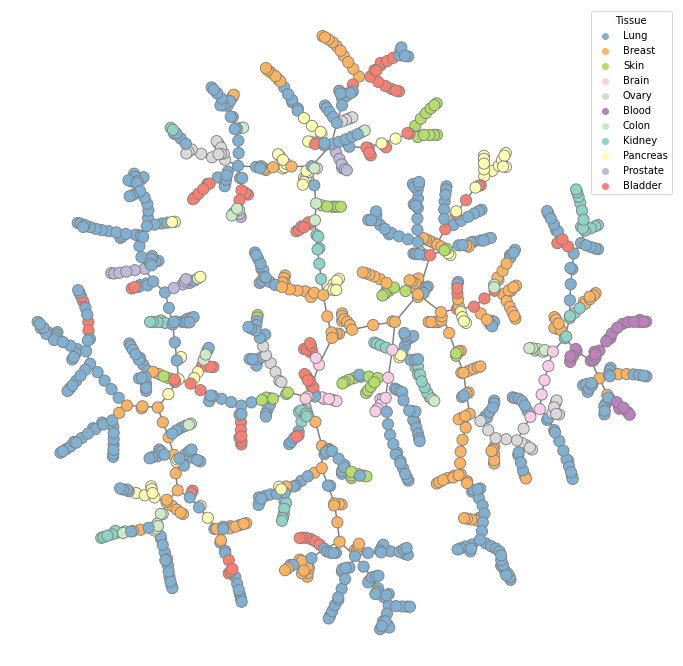

In [25]:
g = sns.scatterplot(x,y, hue = cell_origin["Tissue"], palette = manual_combined, s = 125, edgecolor = "grey",
                   hue_order = ["Lung", "Breast", "Skin", "Brain", "Ovary", "Blood", "Colon", "Kidney", "Pancreas", "Prostate", "Bladder"])

for edges in zip(s,t):
    #print(edges
    #print("start", (x[edges[0]], y[edges[0]]), (x[edges[1]], y[edges[1]]))
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("Tmap_master_v2.pdf", transparent = True)

## Sub tmaps

In [26]:
tissue_palettes2 = sns.color_palette(["#C0C0C0", "#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0",sns.color_palette("Set3")[0],"#C0C0C0"
                                      ,sns.color_palette("Set3")[1], "#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0", "#C0C0C0",sns.color_palette("Set3")[2]
                                      ,"#C0C0C0","#C0C0C0",sns.color_palette("Set3")[3]
                                      , sns.color_palette("Set3")[4]], n_colors = len(Counter(tissue_type)))

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


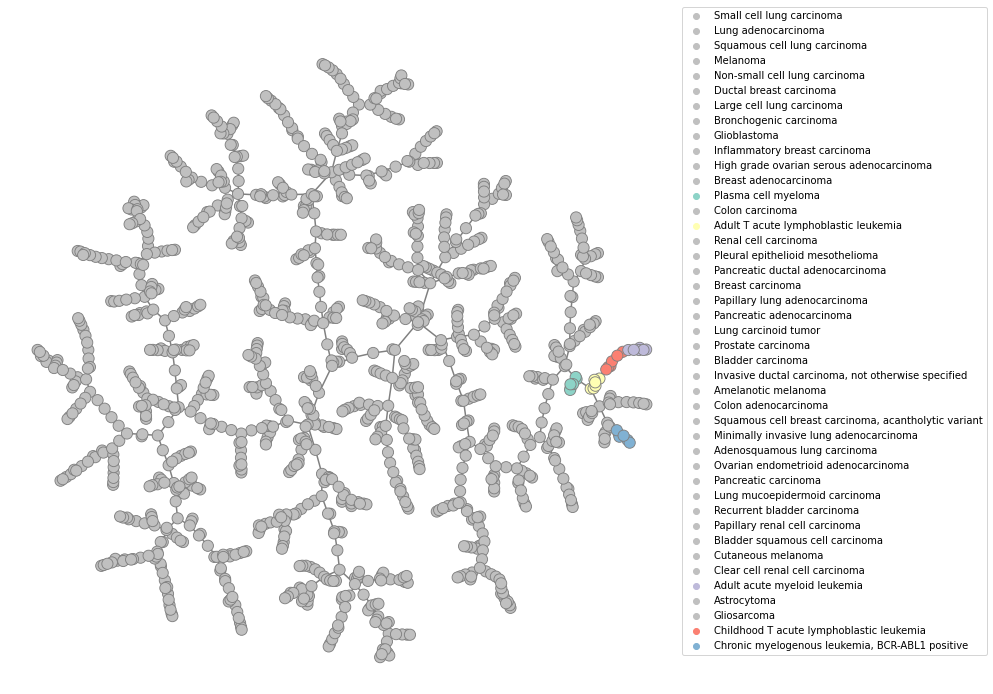

In [30]:
g = sns.scatterplot(x,y, hue = tissue_type, palette = tissue_palettes2, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    #print(edges)
    #print("start", (x[edges[0]], y[edges[0]]), (x[edges[1]], y[edges[1]]))
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

g.legend(bbox_to_anchor=(1, 1.05))

plt.savefig("Tmap_blood_only_v2.pdf")

In [28]:
tissue_palettes3 = sns.color_palette([sns.color_palette("Set3")[5],sns.color_palette("Set3")[6]
                                      ,sns.color_palette("Set3")[7],"#C0C0C0"
                                      ,sns.color_palette("Set3")[11],"#C0C0C0", sns.color_palette("Set3")[10]
                                      ,sns.color_palette("Set3")[9],"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0",sns.color_palette("Set3")[2], "#C0C0C0",sns.color_palette("Set3")[4]
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"
                                      ,sns.color_palette("Set3")[1], sns.color_palette("Set3")[2] ,"#C0C0C0","#C0C0C0", sns.color_palette("Set3")[0]
                                      ,"#C0C0C0","#C0C0C0"
                                      ,"#C0C0C0","#C0C0C0","#C0C0C0", "#C0C0C0",
                                     "#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0","#C0C0C0"], n_colors = len(Counter(tissue_type)))

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


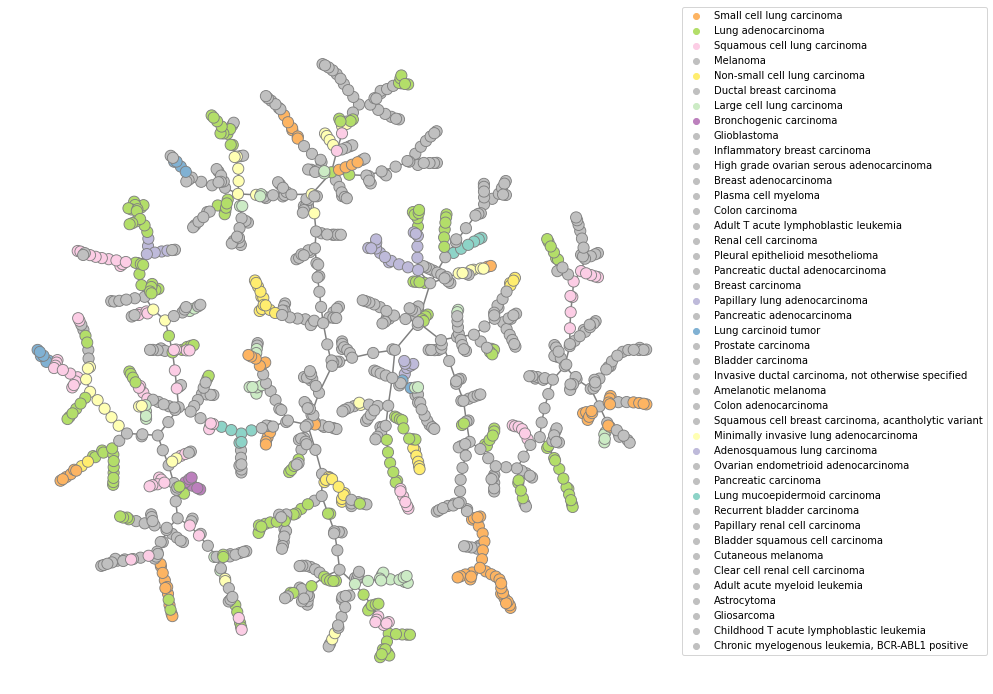

In [29]:
g = sns.scatterplot(x,y, hue = tissue_type, palette = tissue_palettes3, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    #print(edges)
    #print("start", (x[edges[0]], y[edges[0]]), (x[edges[1]], y[edges[1]]))
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

g.legend(bbox_to_anchor=(1, 1.05))

plt.savefig("Tmap_lung_only_v2.pdf")

## Mutations

In [31]:
pathwaydata = pd.read_csv("./../../Mutation_clustering/Celllines_mutations_bypathway.csv", index_col = "Unnamed: 0")

In [32]:
pathwaydata = pathwaydata.set_index("cellline")

In [33]:
pathwaydata

MYC  NRF2  Cell_cycle  HIPPO  PI3K  MAPK  RTK-RAS  TP53  WNT  \
cellline                                                                   
MDA-MB-436    0     0           1      1     1     0        0     1    1   
RT-4          1     0           0      1     1     1        0     0    1   
BFTC-905      0     1           1      0     0     0        0     1    1   
OVCAR-3       0     0           0      1     1     0        0     1    1   
SK-LU-1       0     0           0      1     0     1        1     1    1   
...         ...   ...         ...    ...   ...   ...      ...   ...  ...   
NCI-H1651     0     0           0      1     1     1        1     1    1   
EPLC-272H     0     0           0      1     1     0        0     1    1   
Calu-1        0     0           0      0     0     1        0     0    1   
Malme-3M      0     0           0      0     0     1        0     0    0   
NCI-H838      0     1           0      1     0     0        0     1    1   

            NOTCH  NFKB  TGF-Beta  EMT  
cellline                                
MDA-MB-436      1     0         0    0  
RT-4            1     0         0    0  
BFTC-905        1     0         0    0  
OVCAR-3         1     0         0    0  
SK-LU-1         1     0         0    0  
...           ...   ...       ...  ...  
NCI-H1651       1     0         0    1  
EPLC-272H       1     0         0    0  
Calu-1          1     0         1    0  
Malme-3M        1     0         0    0  
NCI-H838        1     0         0    0  

[163 rows x 13 columns]

In [34]:
sample_data_mapped = sample_data[~sample_data["DI"].isnull()]
sample_data_mapped = sample_data_mapped[sample_data_mapped["DI"] != "[]"]

In [35]:
colorlist = []
for item in sample_data_mapped["ID"].tolist():
    mutationlist = pathwaydata[pathwaydata.index == item]
    if (len(mutationlist) == 0):
        colorlist.append([2,2,2,2,2,2,2,2,2,2,2,2,2])
    else:
        colorlist.append(mutationlist.values[0])

In [36]:
colorframe = pd.DataFrame.from_records(colorlist)

In [37]:
colorframe.columns = pathwaydata.columns
colorframe.index = sample_data_mapped.index

In [38]:
colorframe = colorframe.replace(1, "Mutated")
colorframe = colorframe.replace(0, "Wildtype")
colorframe = colorframe.replace(2, "No Data")

In [39]:
new_colorlist = [manual_combined[10], "grey", manual_combined[0]]

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


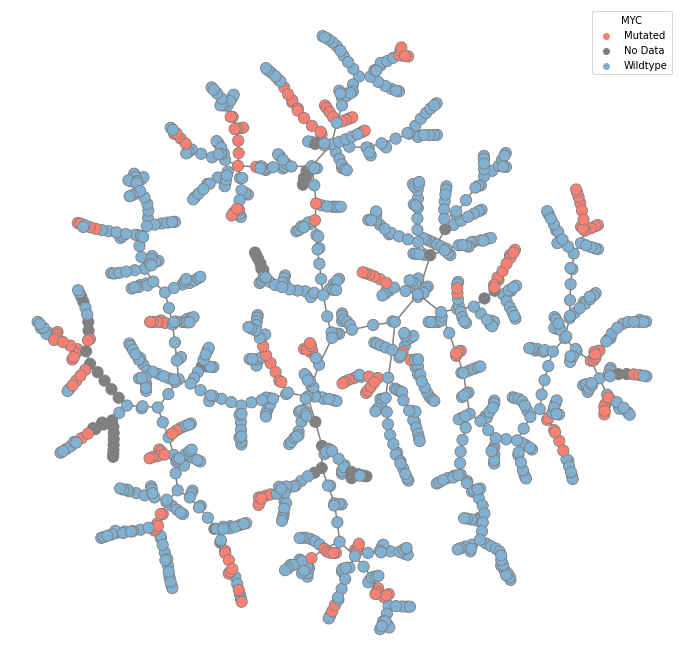

In [40]:
g = sns.scatterplot(x,y, hue = colorframe["MYC"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])


plt.savefig("MYC_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


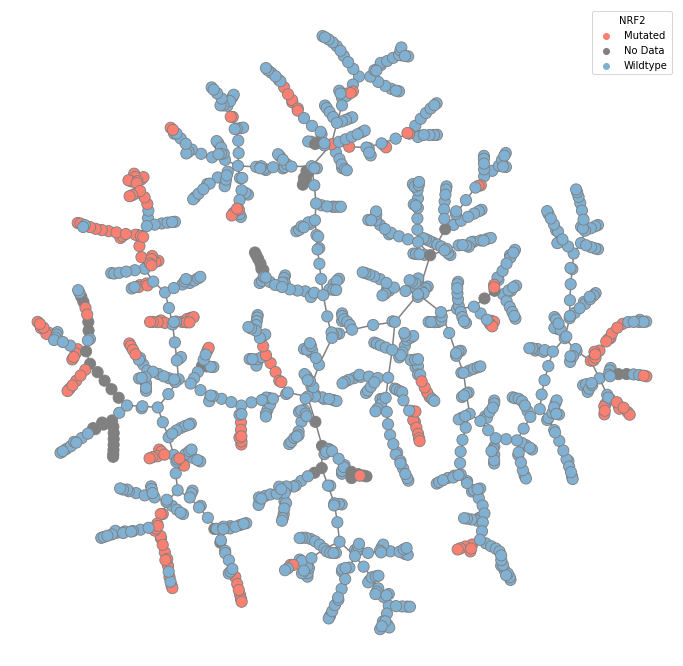

In [41]:
g = sns.scatterplot(x,y, hue = colorframe["NRF2"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("NRF2_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


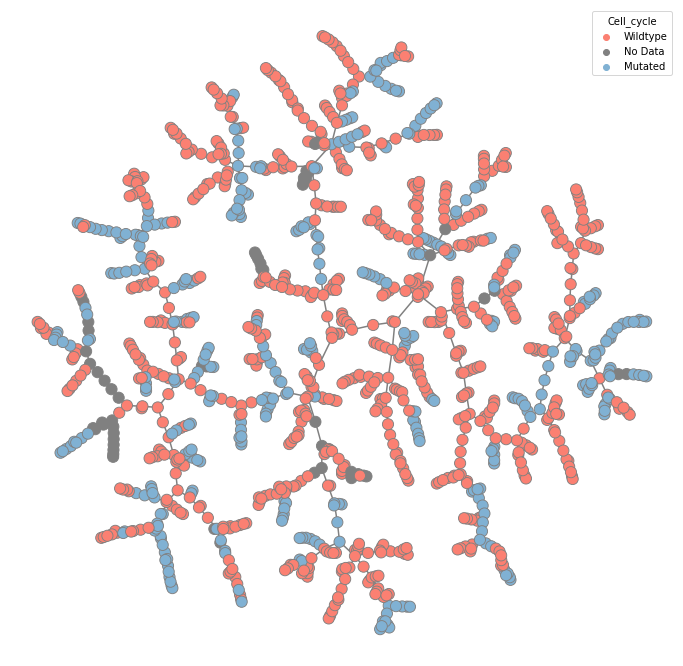

In [42]:
g = sns.scatterplot(x,y, hue = colorframe["Cell_cycle"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("Cell_cycle_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


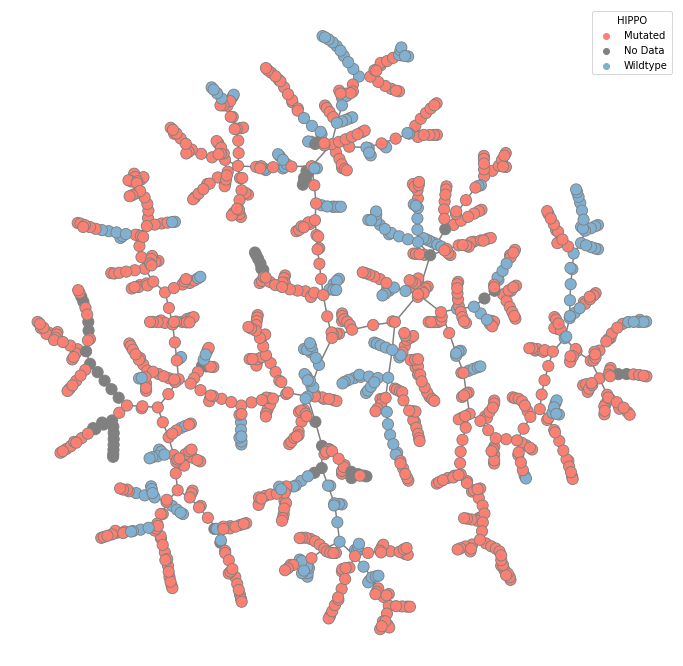

In [43]:
g = sns.scatterplot(x,y, hue = colorframe["HIPPO"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("HIPPO_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


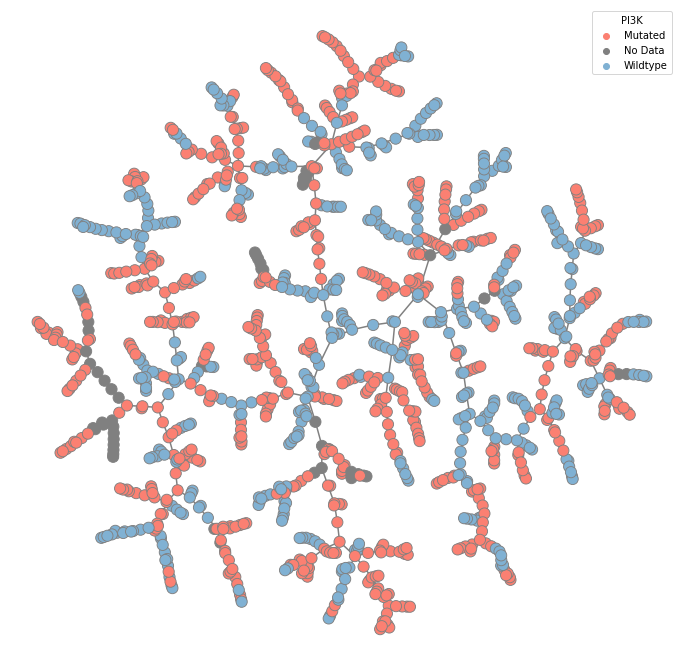

In [44]:
g = sns.scatterplot(x,y, hue = colorframe["PI3K"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("PI3K_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


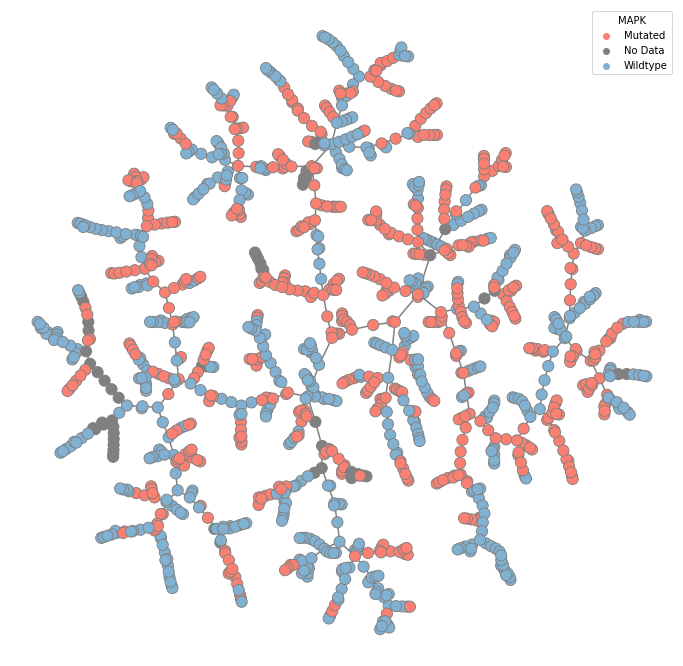

In [45]:
g = sns.scatterplot(x,y, hue = colorframe["MAPK"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("MAPK_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


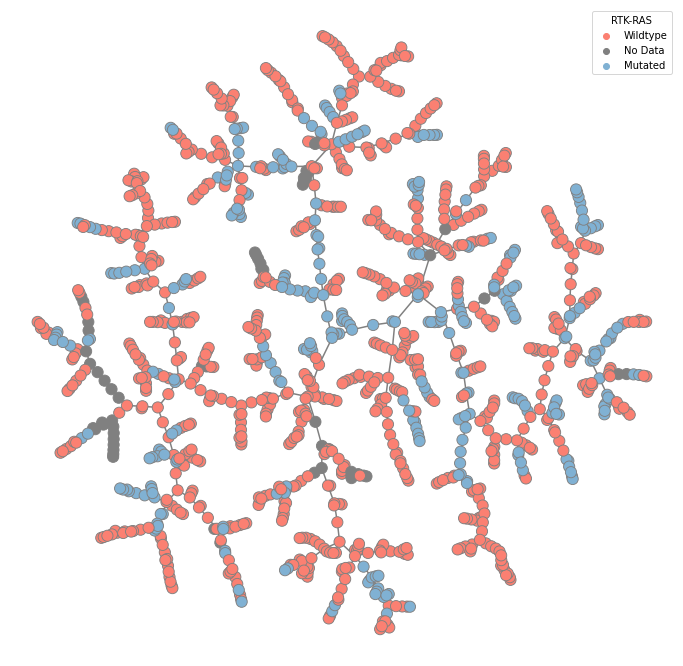

In [46]:
g = sns.scatterplot(x,y, hue = colorframe["RTK-RAS"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("RTK-RAS_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


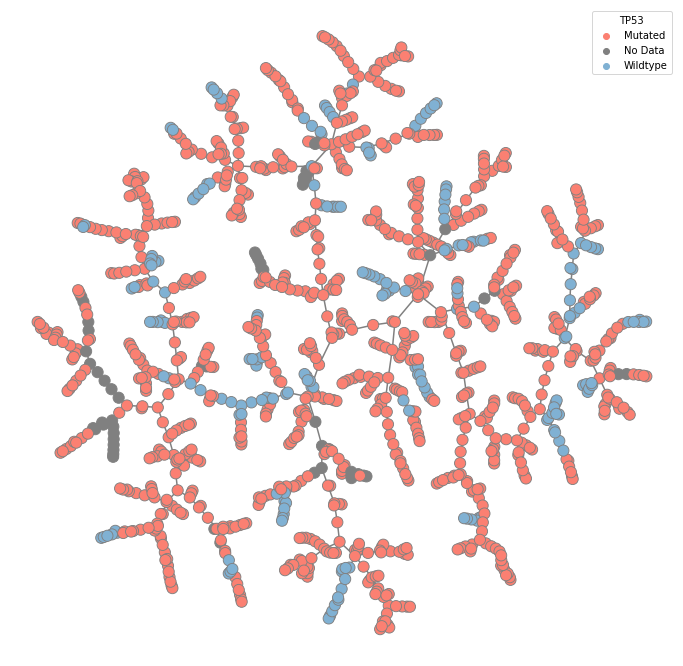

In [47]:
g = sns.scatterplot(x,y, hue = colorframe["TP53"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("TP53_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


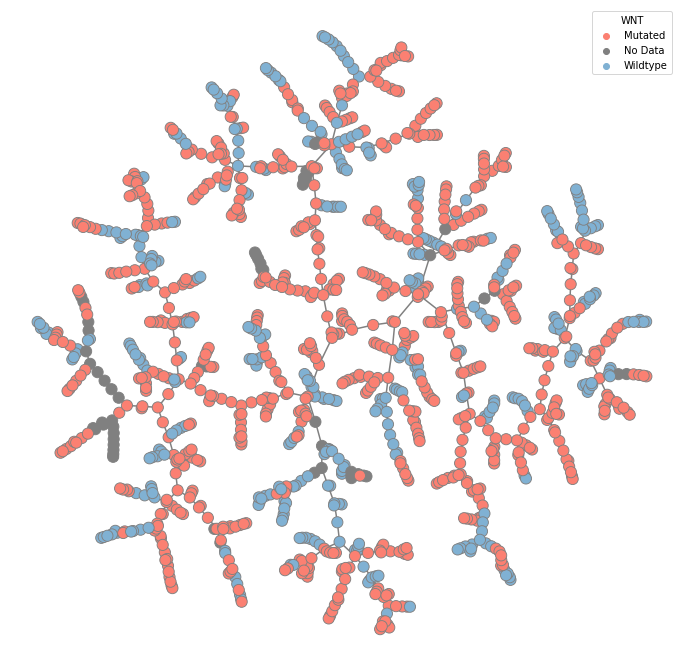

In [48]:
g = sns.scatterplot(x,y, hue = colorframe["WNT"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("WNT_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


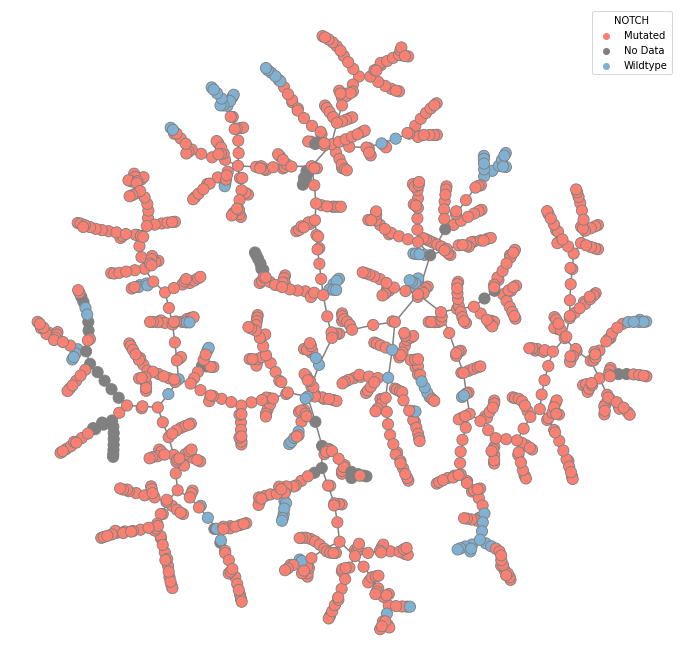

In [49]:
g = sns.scatterplot(x,y, hue = colorframe["NOTCH"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("NOTCH_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


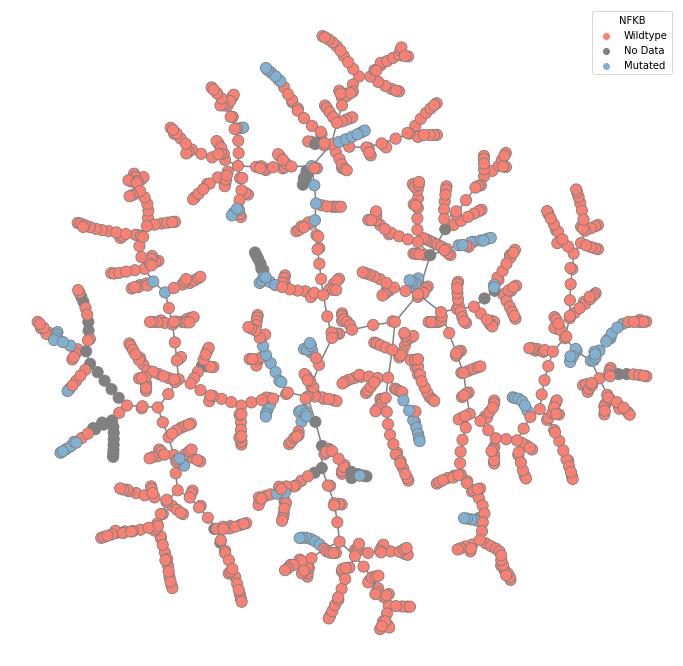

In [50]:
g = sns.scatterplot(x,y, hue = colorframe["NFKB"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("NFKB_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


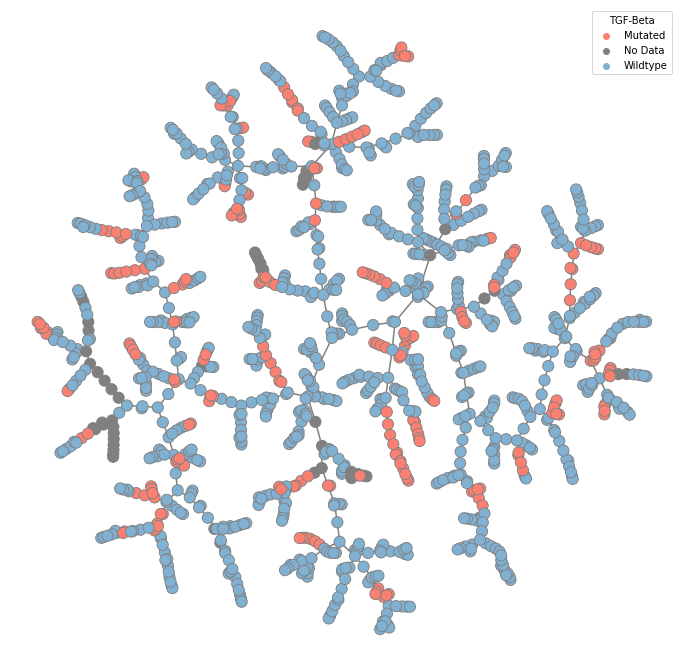

In [51]:
g = sns.scatterplot(x,y, hue = colorframe["TGF-Beta"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("TGF-Beta_tmap_v2.pdf", bbox_inches = "tight")

/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/davidshorthouse/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


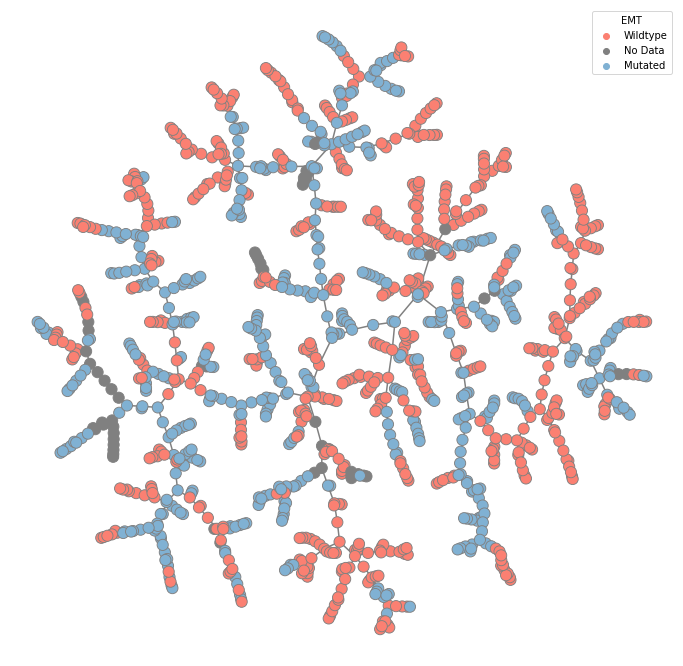

In [52]:
g = sns.scatterplot(x,y, hue = colorframe["EMT"], palette = new_colorlist, s = 125, edgecolor = "grey")

for edges in zip(s,t):
    plt.plot((x[edges[0]], x[edges[1]]), (y[edges[0]], y[edges[1]]), c= "grey", zorder = 0)
sns.despine(left = True, bottom = True)
g.set_xticks([])
g.set_yticks([])

plt.savefig("EMT_tmap_v2.pdf", bbox_inches = "tight")

## Pie Chart

In [53]:
tissue_labels = cell_origin["Tissue"]

labels = set(tissue_labels.tolist())
sizes = []
for item in labels:
    sizes.append(cell_origin["Tissue"].tolist().count(item))
    print(item, cell_origin["Tissue"].tolist().count(item))

Blood 30
Breast 210
Lung 570
Bladder 102
Brain 24
Ovary 38
Colon 34
Kidney 62
Pancreas 70
Skin 54
Prostate 18


In [63]:
def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

In [75]:
cmap = ['#80b1d3', '#d9d9d9', '#8dd3c7', '#fdb462', '#ccebc5', '#ffffb3','#fb8072','#bebada'
        , '#bc80bd','#b3de69', '#fccde5']

hue_order = ["Lung", "Breast", "Skin", "Brain", "Ovary", "Blood", "Colon", "Kidney", "Pancreas", "Prostate", "Bladder"]

In [76]:
sizes = []
labels2 = unique(tissue_labels)
for item in hue_order:
    sizes.append(cell_origin["Tissue"].tolist().count(item))
    print(item, cell_origin["Tissue"].tolist().count(item))

Lung 570
Breast 210
Skin 54
Brain 24
Ovary 38
Blood 30
Colon 34
Kidney 62
Pancreas 70
Prostate 18
Bladder 102


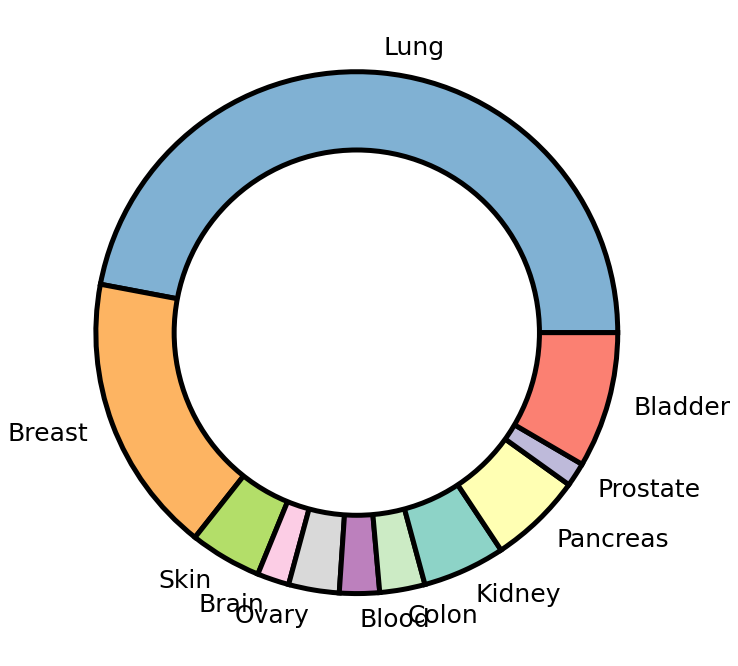

In [79]:
wedges, texts = plt.pie(sizes, labels=hue_order, textprops={'fontsize': 25}
                        ,colors = manual_combined, wedgeprops = { 'linewidth' : 5 , 'edgecolor' : 'black'},)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7,facecolor = 'white', edgecolor = "k", linewidth = 5)

#for w in wedges:
#    w.set_linewidth(100)

p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.show()

plt.savefig("Piechart_accurate_colors.pdf")